# Epidemics

During this seminar we will numerically solve systems of differential equations of SI, SIS and SIR models. <br\> This experience is going to help us as we switch to network models. 

## SI model

In this model a sustainable infection process is considered. Infected part of population has no chance to be healed..<br>
In other words:
\begin{equation}
   \begin{cases}
   \cfrac{ds(t)}{dt} = -\beta s(t)i(t)\\
   \cfrac{di(t)}{dt} = \beta s(t)i(t)
  \end{cases}
  \\
  i(t) + s(t) = 1
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

In [8]:
# spreading coefficient
beta = 0.2

# initial state
i0 = 0.6
z0 = [1-i0, i0]

# time domain
t = np.arange(50)

# system of differential equations..
def si(z, t, beta):
    return np.array([
        -beta * z[1] * z[0],
         beta * z[1] * z[0]])

# solved
z = odeint(si, z0, t, (beta,))

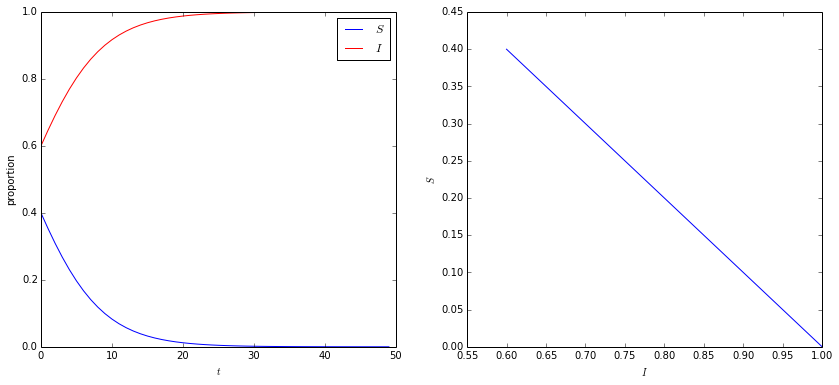

In [14]:
# Lets plot our solution and phase-plot
fig, ax = plt.subplots(1,2,figsize=(14,6))
lines = ax[0].plot(z)
plt.setp(lines[0], color='blue')
plt.setp(lines[1], color='red')
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('proportion')
ax[0].legend(['$S$', '$I$'])
ax[1].plot(z[:,1], z[:,0])
ax[1].set_xlabel('$I$')
ax[1].set_ylabel('$S$')

The cool thing is that we can set $\beta$ and $\gamma$ to be dependent on $t$, that is interpreted as some ''sessional'' profile of the desease. <br\>
Now, based on this code, implement SIS and SIR models:

## SIS model

SIS model allowes infected agents to be cured, but without any further immunity.
\begin{equation}
   \begin{cases}
   \cfrac{ds(t)}{dt} = -\beta s(t)i(t) + \gamma i(t)\\
   \cfrac{di(t)}{dt} = \beta s(t)i(t) - \gamma i(t)
  \end{cases}
  \\
  i(t) + s(t) = 1
\end{equation}
Implement this model and check cases when $\gamma \lessgtr \beta$

In [62]:
beta = 0.5
gamma = 0.1

# initial state
i0 = 0.6
z0 = [1-i0, i0]

# time domain
t = np.arange(50)

# system of differential equations..
def sis(z, t, beta, gamma):
    return np.array([
        -beta * z[1] * z[0] + gamma * z[1],
         beta * z[1] * z[0] - gamma * z[1]])

# solved
z = odeint(sis, z0, t, (beta,gamma))

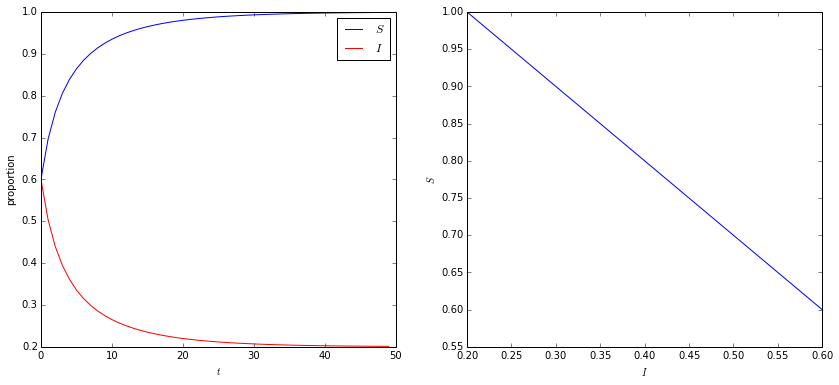

In [61]:
# Lets plot our solution and phase-plot
fig, ax = plt.subplots(1,2,figsize=(14,6))
lines = ax[0].plot(z)
plt.setp(lines[0], color='blue')
plt.setp(lines[1], color='red')
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('proportion')
ax[0].legend(['$S$', '$I$'])
ax[1].plot(z[:,1], z[:,0])
ax[1].set_xlabel('$I$')
ax[1].set_ylabel('$S$')

## SIR model

In SIR model healed population gain immunity to the infection
\begin{equation}
   \begin{cases}
   \cfrac{ds(t)}{dt} = -\beta s(t)i(t)\\
   \cfrac{di(t)}{dt} = \beta s(t)i(t) - \gamma i(t)\\
   \cfrac{dr(t)}{dt} = \gamma i(t)
  \end{cases}
  \\
  i(t) + s(t) + r(t) = 1
\end{equation}

In [74]:
# put your code here
beta = 2
gamma = 0.6

# initial state
i0 = 0.2
r0 = 0
z0 = [1-i0-r0, i0, r0]

# time domain
t = np.arange(50)

# system of differential equations..
def sir(z, t, beta, gamma):
    return np.array([
        -beta * z[1] * z[0],
         beta * z[1] * z[0] - gamma * z[1],
         gamma * z[1]])

# solved
z = odeint(sir, z0, t, (beta,gamma))

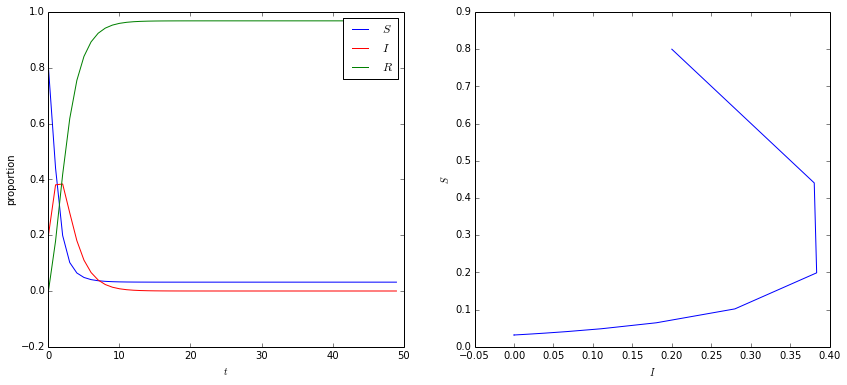

In [75]:
# Lets plot our solution and phase-plot
fig, ax = plt.subplots(1,2,figsize=(14,6))
lines = ax[0].plot(z)
plt.setp(lines[0], color='blue')
plt.setp(lines[1], color='red')
plt.setp(lines[2], color='green')
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('proportion')
ax[0].legend(['$S$', '$I$', '$R$'])
ax[1].plot(z[:,1], z[:,0])
ax[1].set_xlabel('$I$')
ax[1].set_ylabel('$S$')